<a href="https://colab.research.google.com/github/MijulSaxena/Retail-Sales-Prediction-Regression-Project/blob/main/Capstone_Project_Supervised_ML_Regression_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.**
# **You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.**

In [1]:
# importing numpy, pandas and matplotlib
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# Load data
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Reading in the Play Store data and User Reviews data from CSV files
rossmann_store_data = pd.read_csv('/content/drive/MyDrive/Rossmann Stores Data.csv')
store = pd.read_csv('/content/drive/MyDrive/Store.csv')

<ipython-input-3-d22a462c249e>:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  rossmann_store_data = pd.read_csv('/content/drive/MyDrive/Rossmann Stores Data.csv')


In [4]:
# Rossmann Store Dataset First Look
rossmann_store_data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [5]:
# Store Dataset First Look
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [6]:
# Checking columns of Rossmann store dataset
rossmann_store_data.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

In [7]:
# Checking columns of Store dataset
store.columns

Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [8]:
# Checking information of rossmann store and store datasets
rossmann_store_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [9]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [10]:
# Renaming columns
store.rename(columns={'CompetitionDistance':'Distance', 'CompetitionOpenSinceMonth': 'OpenMonth', 'CompetitionOpenSinceYear': 'OpenYear',   'Promo2SinceWeek': 'PromoWeek',
    'Promo2SinceYear': 'PromoYear'}, inplace = True)

In [11]:
# Missing values in store dataset
store.isnull().sum()

Store              0
StoreType          0
Assortment         0
Distance           3
OpenMonth        354
OpenYear         354
Promo2             0
PromoWeek        544
PromoYear        544
PromoInterval    544
dtype: int64

In [12]:
# Dropping null values in Competition distance
store.dropna(subset=['Distance'], inplace=True)

Open Month and open year is categorical data. So we will replace all null values in those two column with mode. Because mode represents the most frequently occurring value in a dataset. It is useful for categorical or discrete variables where you want to preserve the most common category.

In [13]:
# Filling null values with mode
store['OpenMonth'].fillna(value=store['OpenMonth'].mode()[0], inplace=True)
store['OpenYear'].fillna(value=store['OpenYear'].mode()[0], inplace=True)

In [14]:
# Filling null values in the 'PromoWeek', 'PromoYear' and PromoInterval' column with 0
store['PromoWeek'].fillna(value=0,inplace=True)
store['PromoYear'].fillna(value=0,inplace=True)
store['PromoInterval'].fillna(value=0,inplace=True)

In [15]:
store.isnull().sum()

Store            0
StoreType        0
Assortment       0
Distance         0
OpenMonth        0
OpenYear         0
Promo2           0
PromoWeek        0
PromoYear        0
PromoInterval    0
dtype: int64

In [16]:
store.shape

(1112, 10)

In [17]:
# Checking duplicates
# Find duplicates in the 'Name' column
duplicates = store['Store'].duplicated().sum()

In [18]:
duplicates

0

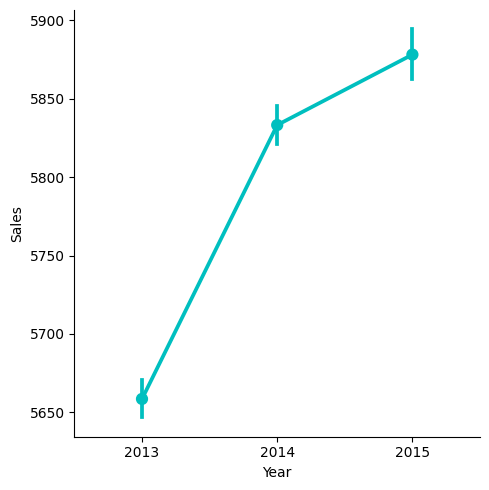

In [19]:
# Convert the 'Date' column to datetime format
rossmann_store_data['Date'] = pd.to_datetime(rossmann_store_data['Date'])

# Extract the year from the 'Date' column and create a new 'Year' column
rossmann_store_data['Year'] = rossmann_store_data['Date'].dt.year

# Create a categorical plot (point plot) with 'Year' on the x-axis and 'Sales' on the y-axis
sns.catplot(x='Year', y='Sales', data=rossmann_store_data, kind='point', color='c')

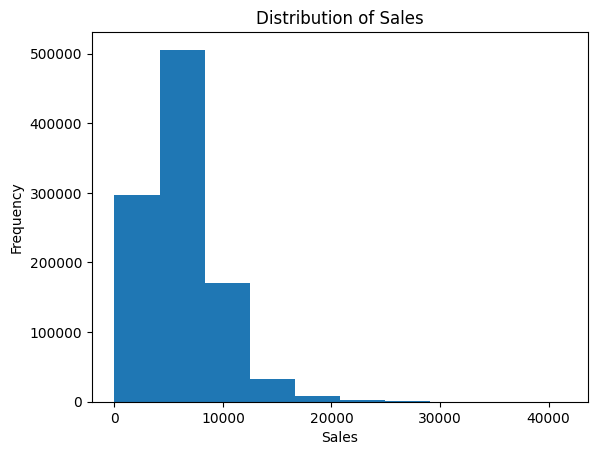

In [20]:
plt.hist(rossmann_store_data['Sales'], bins=10)
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.title('Distribution of Sales')

plt.show()


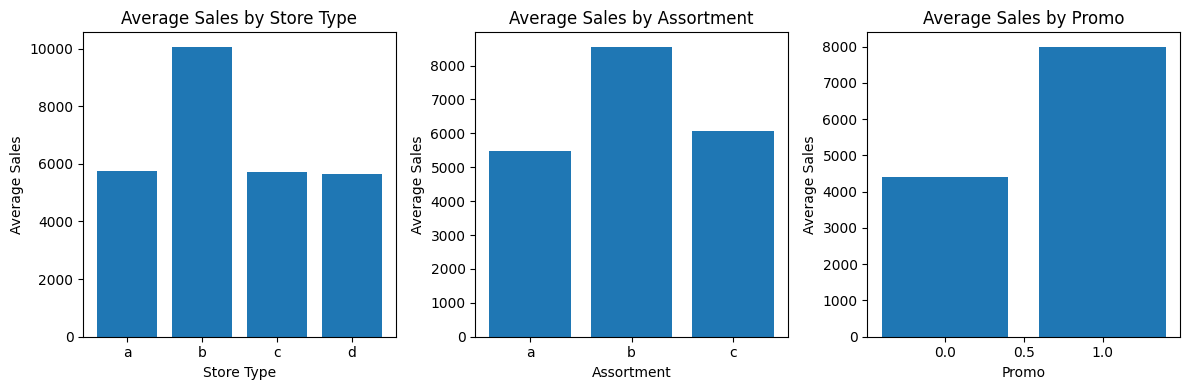

In [21]:
# Merging the datasets
merge_df = rossmann_store_data.merge(store, how='left', on='Store')

# Create a figure with subplots
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# Group the data by 'StoreType' and calculate the average sales per category
average_sales_by_storetype = merge_df.groupby('StoreType')['Sales'].mean()

# Plot the bar chart for average sales by store type
axes[0].bar(average_sales_by_storetype.index, average_sales_by_storetype)
axes[0].set_xlabel('Store Type')
axes[0].set_ylabel('Average Sales')
axes[0].set_title('Average Sales by Store Type')

# Group the data by 'Assortment' and calculate the average sales per category
average_sales_by_assortment = merge_df.groupby('Assortment')['Sales'].mean()

# Plot the bar chart for average sales by assortment
axes[1].bar(average_sales_by_assortment.index, average_sales_by_assortment)
axes[1].set_xlabel('Assortment')
axes[1].set_ylabel('Average Sales')
axes[1].set_title('Average Sales by Assortment')

# Group the data by 'Promo' and calculate the average sales per category
average_sales_by_promo = merge_df.groupby('Promo')['Sales'].mean()

# Plot the bar chart for average sales by promo
axes[2].bar(average_sales_by_promo.index, average_sales_by_promo)
axes[2].set_xlabel('Promo')
axes[2].set_ylabel('Average Sales')
axes[2].set_title('Average Sales by Promo')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


<ipython-input-22-b3d20a44dac5>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(merge_df.corr(), annot=True)


<Axes: >

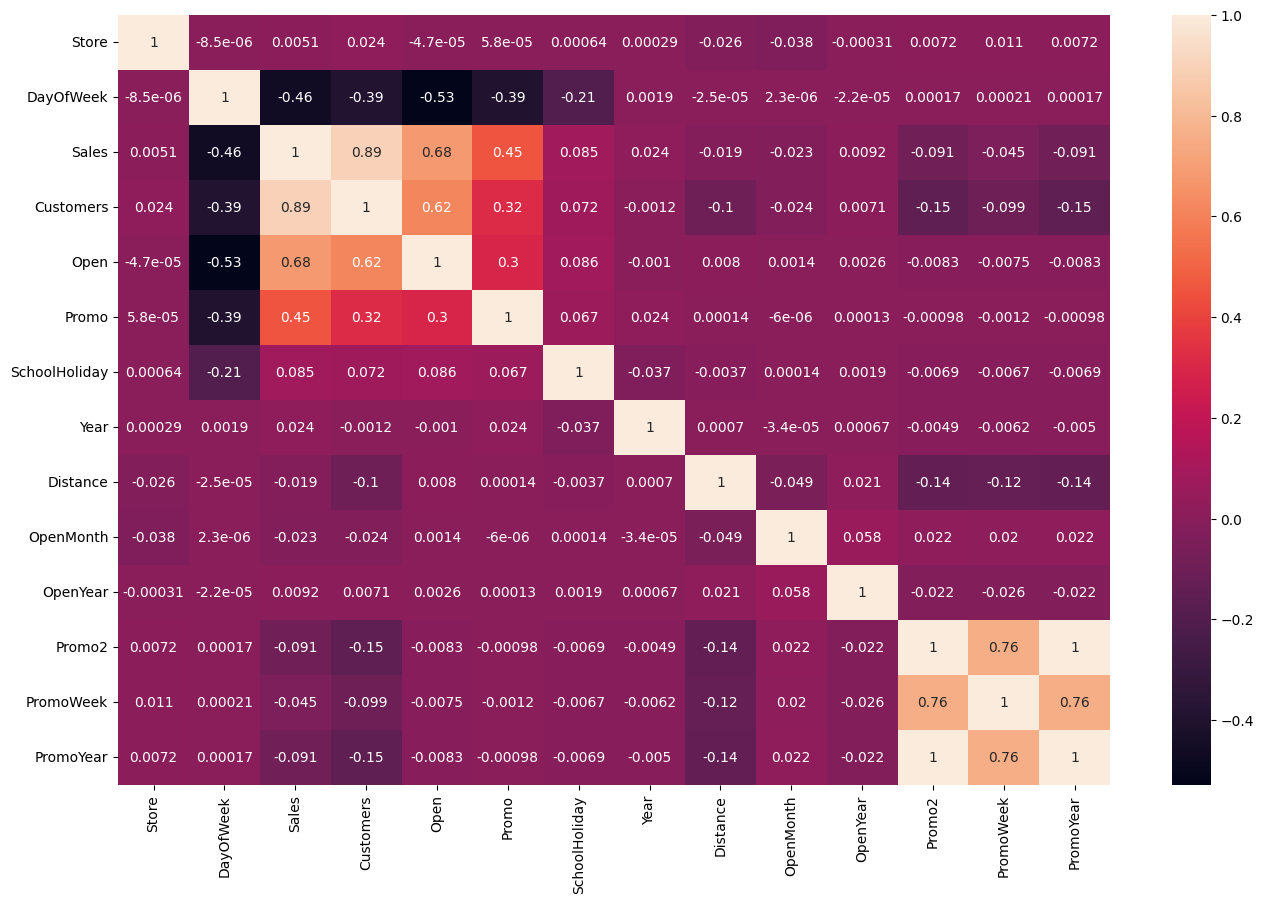

In [22]:
# correlation heatmap
plt.figure(figsize=(16,10))
sns.heatmap(merge_df.corr(), annot=True)

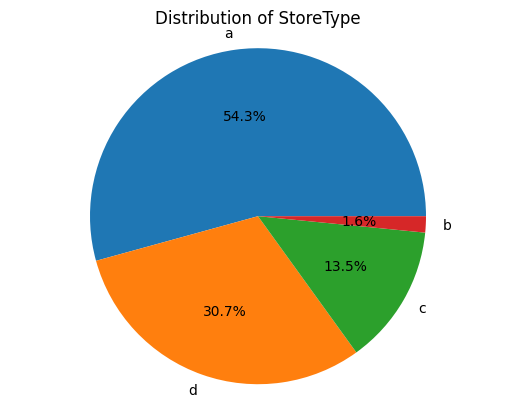

In [31]:
# Count the occurrences of each StoreType
storetype_counts = merge_df['StoreType'].value_counts()

# Plot the pie chart
plt.pie(storetype_counts, labels=storetype_counts.index, autopct='%1.1f%%')

# Set the aspect ratio to be equal so that the pie is drawn as a circle
plt.axis('equal')

# Set the title of the plot
plt.title('Distribution of StoreType')

# Show the plot
plt.show()

In [24]:
merge_df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'Year', 'StoreType', 'Assortment',
       'Distance', 'OpenMonth', 'OpenYear', 'Promo2', 'PromoWeek', 'PromoYear',
       'PromoInterval'],
      dtype='object')

In [26]:
merge_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,StoreType,Assortment,Distance,OpenMonth,OpenYear,Promo2,PromoWeek,PromoYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,2015,c,a,1270.0,9.0,2008.0,0.0,0.0,0.0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,2015,a,a,570.0,11.0,2007.0,1.0,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,2015,a,a,14130.0,12.0,2006.0,1.0,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,2015,c,c,620.0,9.0,2009.0,0.0,0.0,0.0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,2015,a,a,29910.0,4.0,2015.0,0.0,0.0,0.0,0


In [27]:
merge_df['Assortment'].value_counts()

a    535745
c    470528
b      8294
Name: Assortment, dtype: int64

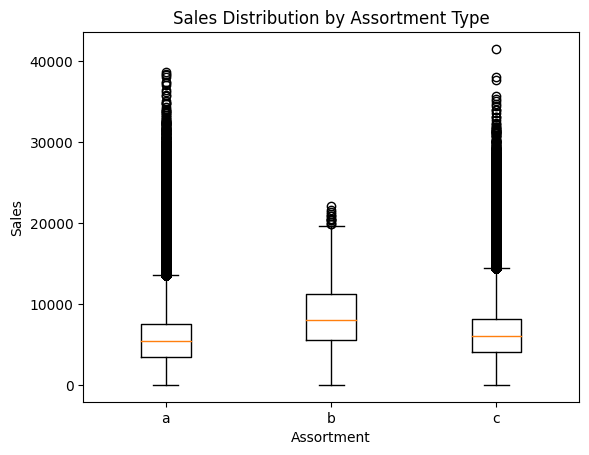

In [28]:
plt.boxplot([merge_df[merge_df['Assortment'] == 'a']['Sales'],
             merge_df[merge_df['Assortment'] == 'b']['Sales'],
             merge_df[merge_df['Assortment'] == 'c']['Sales']],
            labels=['a', 'b', 'c'])
plt.xlabel('Assortment')
plt.ylabel('Sales')
plt.title('Sales Distribution by Assortment Type')
plt.show()